In [1]:
from gensim.models.ldamodel import LdaModel
import gensim
import pandas as pd
import glob
from nltk.corpus import stopwords
import string
from gensim import corpora,models
from gensim.utils import lemmatize # Only keep nums
from gensim.corpora import Dictionary
%matplotlib inline
import matplotlib.pyplot as plt
from nltk.stem.wordnet import WordNetLemmatizer
import sys
import numpy as np
import enchant
%config InlineBackend.figure_format = 'retina'

C:\Users\mnan\Anaconda3\lib\site-packages\gensim\utils.py:840: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\mnan\Anaconda3\lib\site-packages\gensim\utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [3]:
def process_text(content_list):
    """
    stopwords
    
    punctuation
    
    digits
    
    english words
    
    """
    typical_words = ['light','therapy','facial','skin','rt','treatment','face']
    stoplist = stopwords.words('english') + typical_words 
    
    remove_digits = str.maketrans('', '', string.digits)
    remove_punctuation = str.maketrans('', '', string.punctuation)
    
    dict_english = enchant.Dict("en_US")
    
    lemma = WordNetLemmatizer()
    
    content_cleaned =[i.translate(remove_digits) for i in content_list]
    
    content_cleaned = [i.translate(remove_punctuation) for i in content_cleaned]
    
    content_cleaned = [[lemma.lemmatize(word.lower()) for word in line.split()
                        if (word.lower() not in stoplist) and dict_english.check(word.lower())==True] for line in content_cleaned]

    return content_cleaned

In [4]:
content = pd.read_csv('text.csv',encoding = 'iso-8859-1',header=None)
content.columns = ['content']
content['content']
print(len(content))
content_list = content['content'].values
cleaned_list = process_text(content_list)
print('after process....')
print(len(cleaned_list))

8001
after process....
8001


Reviews with no extracted value

In [5]:
len(list(filter(lambda x:x==[],cleaned_list)))

62

In [6]:
cleaned_list

[['skincare', 'benefit', 'violet'],
 ['led', 'anti', 'aging', 'excellent', 'remedy', 'anti', 'care'],
 ['spotted', 'new', 'favorite', 'beauty', 'acne', 'mask'],
 ['may',
  'lotion',
  'lite',
  'review',
  'two',
  'favorite',
  'product',
  'acid',
  'alpha',
  'hydroxy',
  'acid',
  'arsenal',
  'smallest',
  'molecule',
  'alpha',
  'hydroxy',
  'acid',
  'meaning',
  'penetrate',
  'deeply',
  'easily',
  'turn',
  'effective',
  'way',
  'treat',
  'fine',
  'line',
  'acne',
  'blackhead',
  'dull',
  'love',
  'suite',
  'product',
  'featuring',
  'acid',
  'particularly',
  'lotion',
  'lite',
  'wear',
  'sunscreen',
  'tinted',
  'moisturizer',
  'day',
  'lite',
  'cream',
  'night',
  'related',
  'tinted',
  'moisturizer',
  'review',
  'related',
  'watch',
  'video',
  'see',
  'product',
  'action',
  'helped',
  'learn',
  'product',
  'clicking',
  'product',
  'icon',
  'mention',
  'post',
  'product',
  'provided',
  'review',
  'purpose',
  'opinion',
  'like',
 

** Build Dict **

In [43]:
dictionary = Dictionary(cleaned_list)
corpus = [dictionary.doc2bow(text) for text in cleaned_list]

** Topic Modeling **

In [138]:
#num_topics = 10
#lda = LdaModel(corpus, num_topics= num_topics,id2word = dictionary)
#lda.show_topics(num_topics,15)

(0,
 '0.033*"led" + 0.028*"psoriasis" + 0.021*"color" + 0.020*"rejuvenation" + 0.020*"photon" + 0.020*"treat" + 0.020*"condition" + 0.019*"used" + 0.018*"system" + 0.018*"mask" + 0.014*"acne" + 0.013*"serious" + 0.010*"get" + 0.007*"beauty" + 0.007*"wrinkle"')

** Save the model **

In [53]:
#import pickle
#with open('lda.pickle', 'wb') as handle:
#    pickle.dump(lda, handle, protocol=pickle.HIGHEST_PROTOCOL)

** Read the model **

In [139]:
import pickle
with open('lda.pickle', 'rb') as handle:
    lda = pickle.load(handle)

In [155]:
num_topics = 10
lda.show_topics(num_topics,15)[0][1].split('+')
import re
topic_word=dict()
for i in range(num_topics):
    topic_word[i]=[]
    for text in lda.show_topics(num_topics,15)[i][1].split('+'):
        topic_word[i].extend(re.findall('[a-z]+', text))

In [160]:
for i in range(10):
    print(topic_word[i])
    print('----------------')

['led', 'ultrasonic', 'home', 'galvanic', 'plus', 'nutrition', 'sun', 'damage', 'million', 'affect', 'according', 'estimated', 'disorder', 'treatment', 'lifting']
----------------
['technology', 'energy', 'panel', 'stop', 'brighten', 'news', 'winter', 'environment', 'bus', 'acne', 'blue', 'led', 'red', 'sun', 'new']
----------------
['led', 'skincare', 'min', 'acne', 'high', 'like', 'intensity', 'ultrasound', 'focused', 'look', 'ultrasonic', 'spa', 'wrinkle', 'stuff', 'machine']
----------------
['work', 'new', 'way', 'dermatology', 'added', 'people', 'problem', 'many', 'even', 'aging', 'may', 'related', 'video', 'cheek', 'probably']
----------------
['red', 'anti', 'led', 'care', 'aging', 'issue', 'cause', 'skincare', 'cell', 'green', 'step', 'remedy', 'wavelength', 'complexion', 'revive']
----------------
['violet', 'skincare', 'benefit', 'cosmetic', 'beauty', 'wrinkle', 'face', 'laser', 'natural', 'sleep', 'right', 'like', 'anti', 'study', 'skin']
----------------
['led', 'photon', 

In [45]:
assign = []
for i in range(len(corpus)):
    assign.append(sorted(lda[corpus[i]],key = lambda x:x[1],reverse = True)[0][0])
conf_score = []
for i in range(len(corpus)):
    conf_score.append(sorted(lda[corpus[i]],key = lambda x:x[1],reverse = True)[0][1])

In [46]:
df_bow = pd.DataFrame({'original_text':content.content.values,
             'corpus':corpus,
            'assign':assign,
            'conf_score':conf_score,
                      'bow':cleaned_list})

** data is been saved in csv file 'topic assign.csv'**

In [58]:
df_bow.to_csv('topic_assign.csv')

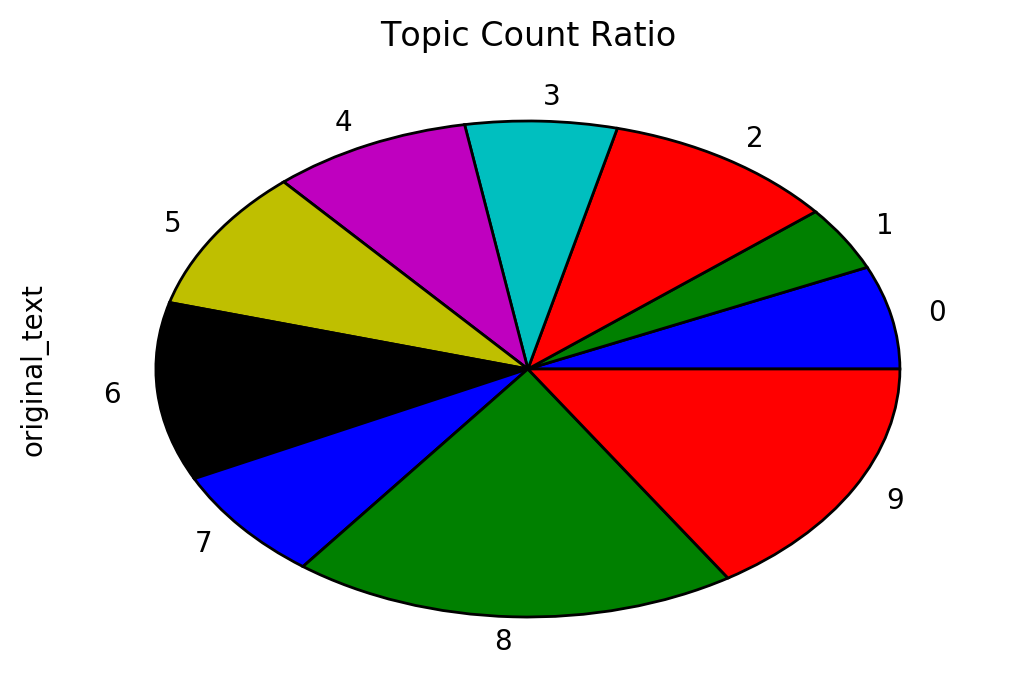

In [136]:
df_bow.groupby('assign').count()['original_text'].plot(kind='pie')
plt.title('Topic Count Ratio')
plt.figure(figsize=(5,5))

check the 8 category

In [54]:
for i in df_bow[df_bow['assign']==8]['original_text'].sample(10):
    print(i+'\n')

RT @DermaSpaDist: How Light Therapy Improves a #Microdermabrasion Treatment dermaspadistributors.com/best-facials-i?  #phototherapy #skincare pic.twitter.com/yb9XyqYJFF

RT @Theralight: Apparently, light therapy can do much more than treat depression!  Take a look at the #skincare possibilities! su.pr/1xpM95

RT @DermaSpaDist: How Light Therapy Improves a #Microdermabrasion Treatment dermaspadistributors.com/best-facials-i?  #phototherapy #skincare pic.twitter.com/yb9XyqYJFF

RT @Theralight: Apparently, light therapy can do much more than treat depression!  Take a look at the #skincare possibilities! su.pr/1xpM95

7 Colors LED Photon Facial Mask Skin Rejuvenation Light Therapy Reduces Wrinkles toys-and-hobbies.info/tysnd/hbbs026/? pic.twitter.com/AsAP9dTzG6

RT @Theralight: Apparently, light therapy can do much more than treat depression!  Take a look at the #skincare possibilities! su.pr/1xpM95

face mask always when watching #realitytv time to re watch the @PumpRules while I @BeautyK

** 9 category is likely to be ads (many general and descriptive words related to promotion, let's see. **

In [48]:
for i in df_bow[df_bow['assign']==9]['original_text'].sample(10):
    print(i+'\n')

reVive Deep-Penetrating Anti-Acne Light Therapy System for $99.99: reVive Deep-Penetrating? goo.gl/fb/yez7zb

RT @skinchats: 10 Tips to Get the Most Out of Light Therapy puls.ly/PFnKig #acne pic.twitter.com/IYfPSaS2f5

Alien looking acne treating light mask from Neutrogena 
#acne #mask #facemask #skincare

light therapy for acne

Video link: https://youtu.be/HeBsRA8_O-w
Acne treatments ? Certain medical procedures may help clear your skin. ... Medical procedures, such as light therapy or chemical peels, may help clear.Lumie Clear is a compact hand-held LED light therapy device clinically proven to treat mild to moderate acne. It combines blue light to attack the bacteria.
Subscribe my channel: https://www.youtube.com/channel/UCCmlDv8vKa4fYqlr-MBD1bQ

Facebook: 
Website: 

light therapy for acne
light therapy for acne at home, light therapy for acne scarring, light therapy for acne rosacea, light therapy for acne during pregnancy, light therapy for acne walmart, light therapy for acne s

** Looks like most of them are actually are ads!!! **

** The model is confident in topic assignment over 80% of the time.**

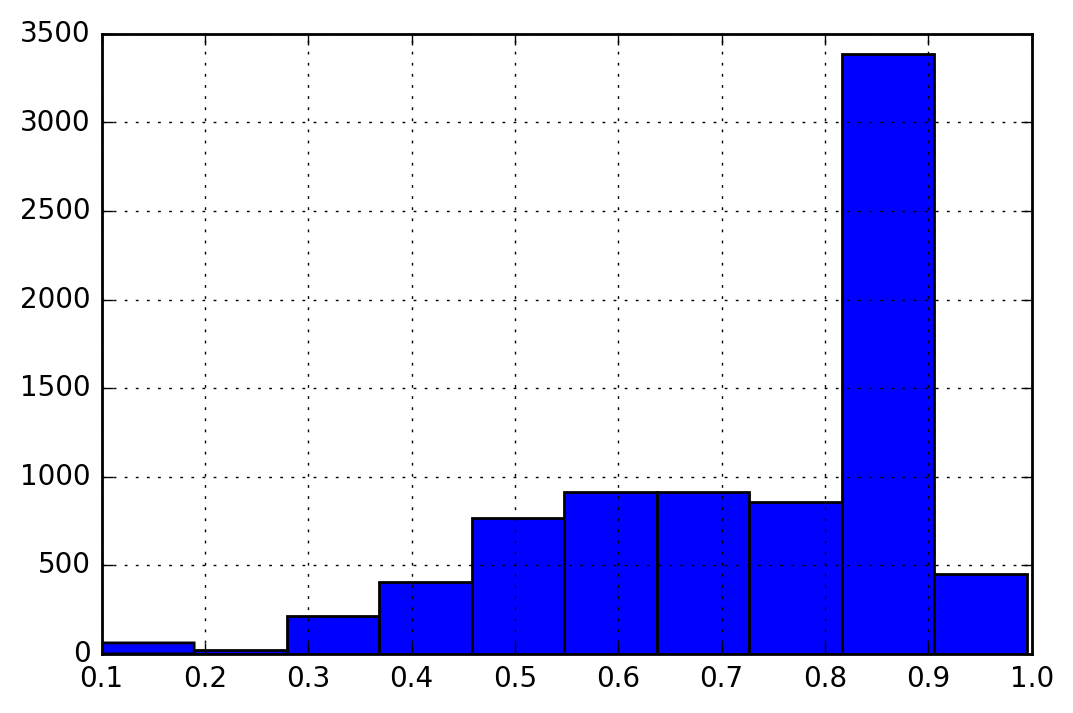

In [137]:
df_bow['conf_score'].hist()

** check records the model not sure of assignment :**

In [41]:
df_bow[df_bow['conf_score']<0.5][['bow','original_text']]

,bow,original_text
3,"[may, face, lotion, lite, review, two, favorit...","Sunday, May 1, 2016\n\nGlyDerm Face Lotion Lit..."
11,"[intranasal, infrared, heal, naturally]",$499 VieLight Intranasal Light Therapy 810 Inf...
31,"[skincare, issue, care]",have any #skincare issues? #olivegold03 and li...
48,"[health, acne, new, blue, color, skincare, acn...",RT @WXU_DEZ_025: #Health #Acne sherif.ws/acne/...
66,"[added, video, hair, mask, acne, lip, smacker]",I added a video to a @YouTube playlist youtu.b...
74,"[talking, away, winter, blue, posted, biologic...",Talking away the winter blues\n\nPosted by Bre...
103,"[attention, new, led, available, come, get, st]",Attention! New LED light therapy now available...
111,"[looking, device, help, shoulder, recover, sur...",While looking for a NIR light therapy device t...
112,"[also, wonder]",Light therapy also does wonders! Led-mask.com
154,"[love, led, face, mask, natural, suit, type, p...",Kourtney Kardashian loves the LED Face Mask.. ...


### Now we try to use TFIDF

In [59]:
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
num_topics = 10
lda_tfidf = LdaModel(corpus_tfidf, id2word=dictionary, num_topics=num_topics)
lda.show_topics(num_topics,15)

[(0,
  '0.016*"led" + 0.013*"ultrasonic" + 0.012*"home" + 0.011*"galvanic" + 0.009*"plus" + 0.009*"nutrition" + 0.009*"sun" + 0.009*"damage" + 0.008*"million" + 0.008*"affect" + 0.007*"according" + 0.007*"estimated" + 0.007*"disorder" + 0.007*"treatment" + 0.006*"lifting"'),
 (1,
  '0.098*"technology" + 0.098*"energy" + 0.098*"panel" + 0.098*"stop" + 0.098*"brighten" + 0.098*"news" + 0.098*"winter" + 0.098*"environment" + 0.098*"bus" + 0.009*"acne" + 0.006*"blue" + 0.004*"led" + 0.003*"red" + 0.003*"sun" + 0.003*"new"'),
 (2,
  '0.033*"led" + 0.022*"skincare" + 0.019*"min" + 0.017*"acne" + 0.016*"high" + 0.016*"like" + 0.016*"intensity" + 0.016*"ultrasound" + 0.015*"focused" + 0.014*"look" + 0.014*"ultrasonic" + 0.014*"spa" + 0.013*"wrinkle" + 0.013*"stuff" + 0.012*"machine"'),
 (3,
  '0.015*"work" + 0.015*"new" + 0.011*"way" + 0.011*"dermatology" + 0.011*"added" + 0.011*"people" + 0.011*"problem" + 0.011*"many" + 0.010*"even" + 0.009*"aging" + 0.008*"may" + 0.008*"related" + 0.008*"vi

In [60]:
assign = []
for i in range(len(corpus_tfidf)):
    assign.append(sorted(lda_tfidf[corpus_tfidf[i]],key = lambda x:x[1],reverse = True)[0][0])
conf_score = []
for i in range(len(corpus_tfidf)):
    conf_score.append(sorted(lda[corpus_tfidf[i]],key = lambda x:x[1],reverse = True)[0][1])

In [61]:
df_tfidf = pd.DataFrame({'original_text':content.content.values,
             'corpus':corpus,
            'assign':assign,
            'conf_score':conf_score,
                      'bow':cleaned_list})

** the model is less confident: **

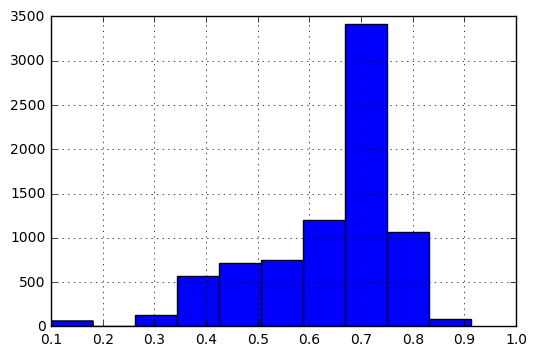

In [62]:
df_tfidf['conf_score'].hist()

** assignment is more evenly distributed: **

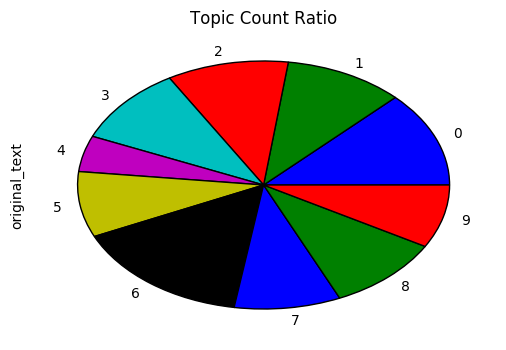

In [63]:
df_tfidf.groupby('assign').count()['original_text'].plot(kind='pie')
plt.title('Topic Count Ratio')
plt.figure(figsize=(5,5))

In [23]:
df_tfidf[df_tfidf['conf_score']<0.5][['bow','original_text']]

,bow,original_text
2,"[spotted, new, favorite, beauty, acne, mask]",@Star_news spotted @Olivia_Holt with her new f...
3,"[may, face, lotion, lite, review, two, favorit...","Sunday, May 1, 2016\n\nGlyDerm Face Lotion Lit..."
25,"[present, doc, peel, wonderful, experience]","#DmvNetworks presents\n\nDC Derm Docs\nBotox, ..."
31,"[skincare, issue, care]",have any #skincare issues? #olivegold03 and li...
48,"[health, acne, new, blue, color, skincare, acn...",RT @WXU_DEZ_025: #Health #Acne sherif.ws/acne/...
49,"[take, control, skincare]",Take control of your #rosacea with an #IPL #Ph...
53,"[color, led, light, photon, rejuvenation, lift...",4 Colors Led Light Therapy Lights Photon Rejuv...
63,"[improves, appearance, application]",RT @Theralight: #Photorejuvenation improves th...
83,"[interested, red, read, skincare]",Interested in having a Red Light Therapy?\nRea...
89,"[opera, led, mask, action, orchid, spa, wellne...",This is the OPERA LED facial mask in action at...


## part of speech 

In [20]:
import nltk
import itertools
from collections import Counter
import operator

In [21]:
corpus_with_pos = list(map(lambda x:nltk.pos_tag(x),cleaned_list))

In [23]:
flattened_corpus_with_pos = []
for sublist in corpus_with_pos:
    for val in sublist:
        flattened_corpus_with_pos.append(val)

In [24]:
flattened_corpus_with_pos

[('skincare', 'NN'),
 ('benefit', 'NN'),
 ('violet', 'NN'),
 ('led', 'VBN'),
 ('anti', 'RP'),
 ('aging', 'VBG'),
 ('excellent', 'JJ'),
 ('remedy', 'NN'),
 ('anti', 'NNS'),
 ('care', 'NN'),
 ('spotted', 'VBN'),
 ('new', 'JJ'),
 ('favorite', 'JJ'),
 ('beauty', 'NN'),
 ('acne', 'NN'),
 ('mask', 'NN'),
 ('may', 'MD'),
 ('lotion', 'VB'),
 ('lite', 'RB'),
 ('review', 'NN'),
 ('two', 'CD'),
 ('favorite', 'JJ'),
 ('product', 'NN'),
 ('acid', 'NN'),
 ('alpha', 'JJ'),
 ('hydroxy', 'JJ'),
 ('acid', 'NN'),
 ('arsenal', 'JJ'),
 ('smallest', 'NN'),
 ('molecule', 'NN'),
 ('alpha', 'IN'),
 ('hydroxy', 'JJ'),
 ('acid', 'NN'),
 ('meaning', 'VBG'),
 ('penetrate', 'NN'),
 ('deeply', 'NNS'),
 ('easily', 'RB'),
 ('turn', 'VBP'),
 ('effective', 'JJ'),
 ('way', 'NN'),
 ('treat', 'NN'),
 ('fine', 'JJ'),
 ('line', 'NN'),
 ('acne', 'NN'),
 ('blackhead', 'NN'),
 ('dull', 'NN'),
 ('love', 'NN'),
 ('suite', 'JJ'),
 ('product', 'NN'),
 ('featuring', 'VBG'),
 ('acid', 'JJ'),
 ('particularly', 'RB'),
 ('lotion', 'NN')

In [7]:
flattened_cleaned_list = []
for sublist in cleaned_list:
    for val in sublist:
        flattened_cleaned_list.append(val)

In [38]:
deduplicated_df_pos

,pos,word
0,NN,skincare
1,NN,benefit
2,NN,violet
3,VBD,led
4,JJ,anti
5,VBG,aging
6,JJ,excellent
7,NN,remedy
9,NN,care
10,VBD,spotted


In [55]:
from collections import Counter
counts = Counter(flattened_cleaned_list).items()
df_word_cnt_pos = pd.DataFrame(sorted(counts,key = lambda x:x[1],reverse = True),columns = ['word','count']).merge(deduplicated_df_pos,on = ['word'])
df_word_cnt_pos.loc[0,'pos']='NN'
df_word_cnt_pos.loc[1,'pos']='NN'

In [77]:
df_word_cnt_pos.groupby('pos').count()
df_w_c_verb = df_word_cnt_pos[df_word_cnt_pos['pos'].isin(['VB','VBD','VBN','VBP','VBZ'])].sort_values('count',ascending = False)

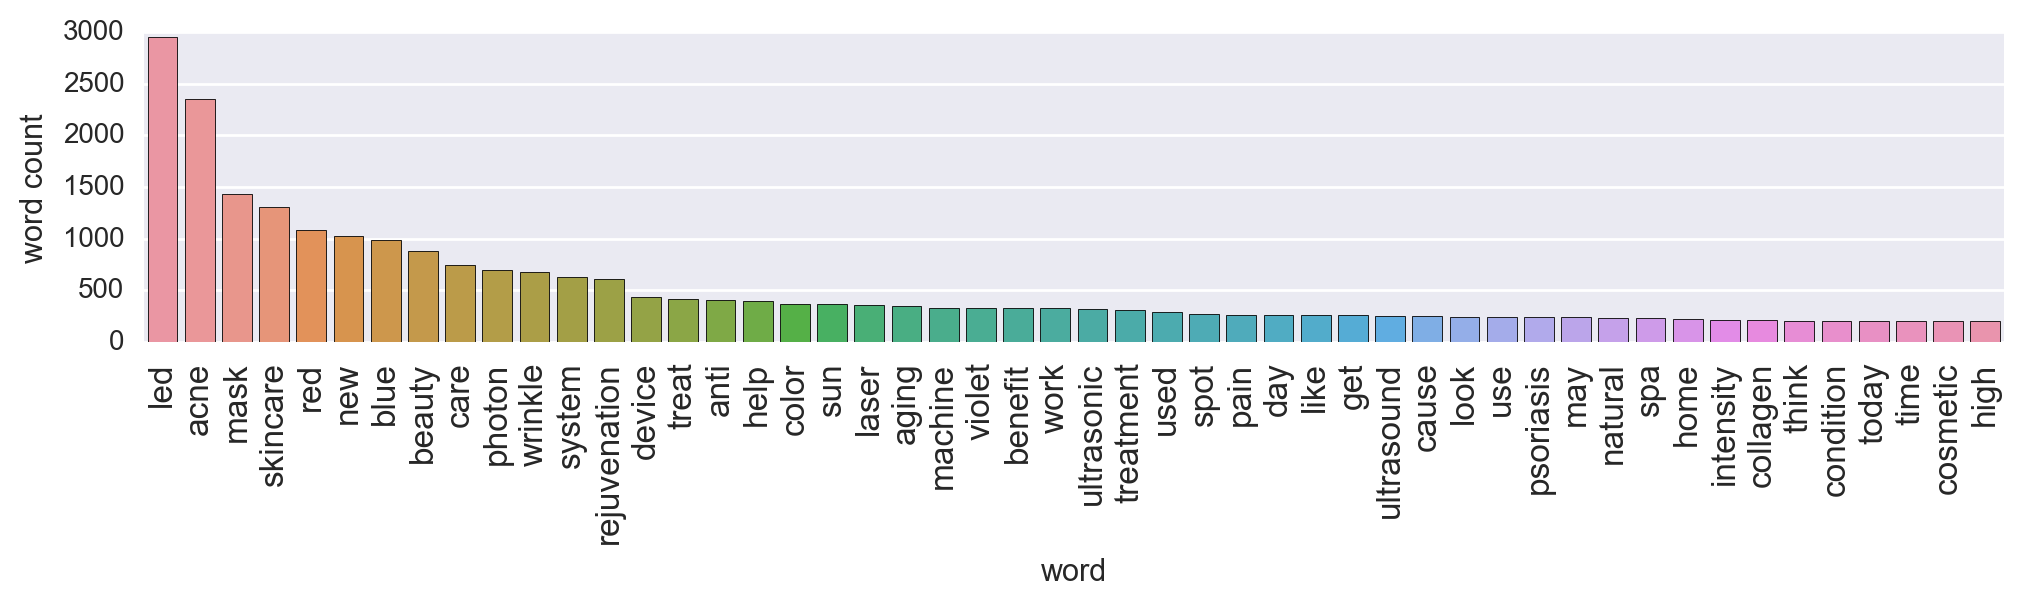

In [86]:
import seaborn as sns
plt.figure(figsize=(12,2))
sns.barplot(data = df_word_cnt_pos[:50],x = 'word',y = 'count')
plt.xticks(rotation = 90,size = 12)
plt.ylabel('word count')

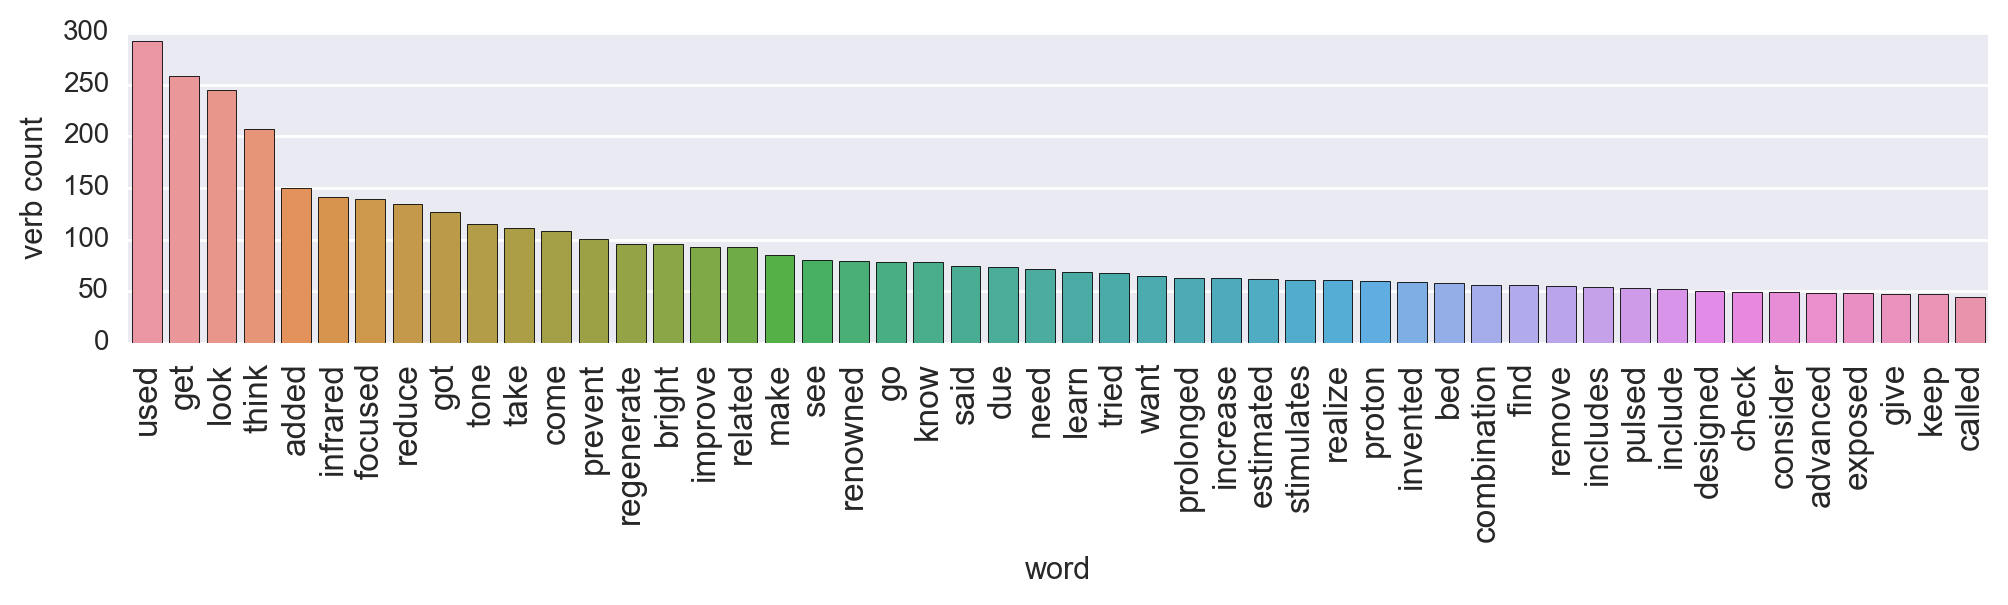

In [87]:
plt.figure(figsize=(12,2))
sns.barplot(data = df_w_c_verb[:50],x = 'word',y = 'count')
plt.xticks(rotation = 90,size = 12)
plt.ylabel('verb count')

In [94]:
print('In 8001 messges:')
for word in ['led','acne','used','get','look','think']:
    n = 0
    text_cnt = len(cleaned_list)
    for list in cleaned_list:
        if word in list:
            n+=1
    print("'%s' appeard %d times (%s)"%(word,n,round(n/text_cnt,3)))        

In 8001 messges:
'led' appeard 2618 times (0.327)
'acne' appeard 1937 times (0.242)
'used' appeard 251 times (0.031)
'get' appeard 228 times (0.028)
'look' appeard 224 times (0.028)
'think' appeard 115 times (0.014)


33% messages mentioned LED and 24% acne

verd used much less than noun

In [26]:
flatterned_corpus_with_pos = nltk.pos_tag(flattened_cleaned_list)

** count unique **

In [27]:
deduplicated_df_pos = pd.DataFrame({'word':flattened_cleaned_list,'pos':list(map(lambda x:x[1],flatterned_corpus_with_pos))}).drop_duplicates(subset=['word'])

In [118]:
deduplicated_df_pos.groupby('pos').count().sort(['word'],ascending = False)

C:\Users\mnan\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,word
pos,
NN,3128
JJ,1508
VBG,552
VBD,383
RB,345
VBN,211
VBP,147
NNS,140
VB,120


In [162]:
deduplicated_df_pos.to_csv('deduplicated_df_pos.csv')

** count **

In [66]:
sorted(dict(Counter(list(map(lambda x: x[1],sum(corpus_with_pos,[]))))).items(),key=operator.itemgetter(1),reverse = True)

[('NN', 46353),
 ('JJ', 16991),
 ('VBD', 4707),
 ('VBG', 4108),
 ('RB', 3319),
 ('VBN', 2654),
 ('VB', 2081),
 ('VBP', 1519),
 ('NNS', 1293),
 ('IN', 1263),
 ('CD', 533),
 ('VBZ', 470),
 ('JJR', 457),
 ('MD', 420),
 ('JJS', 332),
 ('FW', 175),
 ('RBR', 147),
 ('CC', 139),
 ('PRP', 137),
 ('DT', 99),
 ('NNP', 71),
 ('RBS', 39),
 ('RP', 36),
 ('WP', 33),
 ('WRB', 18),
 ('SYM', 12),
 ('UH', 8),
 ('EX', 6),
 ('WDT', 4),
 ('WP$', 2),
 ('PRP$', 1)]

** check pos interactively **

In [128]:
from ipywidgets import interact
from ipywidgets import Dropdown, FloatSlider
def print_pos(pos):
    
    print(deduplicated_df_pos[deduplicated_df_pos['pos']==pos]['word'])
    
col_list = list(deduplicated_df_pos['pos'].unique())
pos = Dropdown(options=col_list, value=col_list[0], description='Part of Speech')
interact(print_pos, pos=pos)

38              turn
72               see
97               get
116             hope
226            enjoy
245             make
386             tone
503             head
614             know
720           suffer
922          outcome
1030          supply
1044          wonder
1062            come
1063              go
1123            wash
1134            lose
1169            wave
1284            look
1328         include
1615            want
1719             say
1879        portrait
1892         receive
2159           trump
2222            tech
2230         believe
2282         provide
2424     combination
3045            give
            ...     
49640     blackberry
50829          rigor
54066         redeem
54120     oppressive
55637      esophagus
55923          robin
55984          rouse
56515        excerpt
60216           land
60986         reefer
63425            tar
64247     illuminate
64261          woven
64324          scarf
64804         legend
68039        suspect
69831        

In [129]:
keep_pos = ['JJ','JJS','JJR','NN','NNP','RB','VB','VBP','VBZ','RBR','VBD','VBN']

In [130]:
list(filter(lambda x: x[0] in keep_pos,dict(Counter(list(map(lambda x: x[1],sum(corpus_with_pos,[]))))).items()))

[('VBZ', 470),
 ('VBN', 2654),
 ('RBR', 147),
 ('VBP', 1519),
 ('JJR', 457),
 ('RB', 3319),
 ('JJ', 16991),
 ('NN', 46353),
 ('NNP', 71),
 ('VB', 2081),
 ('VBD', 4707),
 ('JJS', 332)]

In [131]:
filtered_corpus_with_pos=[]
for i in corpus_with_pos:
    filtered_corpus_with_pos.append(list(filter(lambda x: x[1] in keep_pos,i)))

In [132]:
filtered_corpus_by_pos = []
for i in filtered_corpus_with_pos:
    filtered_corpus_by_pos.append(list(map(lambda x: x[0],i)))

In [133]:
dictionary_pos = Dictionary(filtered_corpus_by_pos)
corpus_pos = [dictionary_pos.doc2bow(text) for text in filtered_corpus_by_pos]

In [134]:
tfidf_by_pos = models.TfidfModel(corpus_pos)
corpus_by_pos_tfidf = tfidf_by_pos[corpus_pos]
num_topics = 10
lda_pos_tfidf = LdaModel(corpus_by_pos_tfidf, id2word=dictionary_pos, num_topics=num_topics)
lda_pos_tfidf.show_topics(num_topics,10)

[(0,
  '0.106*"environment" + 0.105*"bus" + 0.103*"brighten" + 0.100*"stop" + 0.100*"panel" + 0.097*"news" + 0.090*"energy" + 0.087*"technology" + 0.084*"winter" + 0.006*"benefit"'),
 (1,
  '0.017*"remedy" + 0.016*"excellent" + 0.015*"care" + 0.015*"way" + 0.014*"equipment" + 0.014*"salon" + 0.014*"digital" + 0.013*"led" + 0.011*"safest" + 0.011*"consider"'),
 (2,
  '0.042*"violet" + 0.022*"prevent" + 0.020*"acne" + 0.020*"help" + 0.016*"blue" + 0.015*"estimated" + 0.014*"affect" + 0.013*"review" + 0.013*"video" + 0.012*"watch"'),
 (3,
  '0.022*"cause" + 0.021*"think" + 0.013*"skincare" + 0.013*"here" + 0.012*"got" + 0.012*"today" + 0.011*"industry" + 0.011*"hot" + 0.011*"quality" + 0.011*"perhaps"'),
 (4,
  '0.022*"revive" + 0.016*"essential" + 0.016*"complexion" + 0.015*"skincare" + 0.015*"step" + 0.013*"sassy" + 0.013*"winter" + 0.012*"grade" + 0.012*"beautification" + 0.010*"spa"'),
 (5,
  '0.021*"min" + 0.018*"led" + 0.017*"beauty" + 0.016*"matter" + 0.016*"photon" + 0.015*"intens

** try bigram **

In [118]:
bigram = gensim.models.Phrases(cleaned_list,min_count=1, threshold=2)
dictionary_text_list = list(bigram[cleaned_list])
train_text_list = list(bigram[cleaned_list])
dictionary_bigram = Dictionary(dictionary_text_list)
corpus_bigram = [dictionary_bigram.doc2bow(text) for text in train_text_list]

C:\Users\mnan\Anaconda3\lib\site-packages\gensim\models\phrases.py:248: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [119]:
num_topics = 10
lda_tfidf = LdaModel(corpus_bigram, id2word=dictionary_bigram, num_topics=num_topics)
lda.show_topics(num_topics,15)

[(0,
  '0.027*"violet" + 0.016*"benefit" + 0.015*"skin" + 0.010*"help" + 0.008*"low" + 0.007*"time" + 0.007*"black" + 0.007*"level" + 0.006*"red" + 0.005*"body" + 0.005*"muscle" + 0.005*"one" + 0.005*"mask" + 0.005*"led" + 0.004*"tone"'),
 (1,
  '0.056*"led" + 0.052*"skin" + 0.030*"wrinkle" + 0.026*"acne" + 0.015*"care" + 0.012*"ultrasound" + 0.012*"ultrasonic" + 0.012*"blue" + 0.011*"high" + 0.011*"red" + 0.010*"intensity" + 0.009*"machine" + 0.009*"focused" + 0.009*"collagen" + 0.008*"rt"'),
 (2,
  '0.019*"day" + 0.017*"new" + 0.017*"mask" + 0.014*"device" + 0.013*"rt" + 0.013*"exciting" + 0.013*"complete" + 0.012*"launching" + 0.011*"added" + 0.007*"medical" + 0.007*"led" + 0.007*"pub" + 0.005*"acne" + 0.005*"patient" + 0.005*"health"'),
 (3,
  '0.099*"led" + 0.061*"mask" + 0.056*"skin" + 0.048*"acne" + 0.042*"beauty" + 0.040*"photon" + 0.040*"rejuvenation" + 0.035*"new" + 0.028*"color" + 0.026*"blue" + 0.025*"red" + 0.018*"care" + 0.016*"sun" + 0.014*"face" + 0.012*"healing"'),
 (4

** Look Bad **

# Conclusion:

#### Bag of Words is the best